# Wordle Analysis
--------
**What is Wordle?**

Wordle is a web-based word game developed by Welsh-born software engineer Josh Wardle. Players have six attempts to guess a five-letter word

----

<img src="images/wordle_splash.png" width="400">

In [1]:
import string
import time
import matplotlib.pyplot as plt
import numpy as np
import solve_wordle

# Getting the dictionary

**How did we get the words?**

1. Right-click and inspect
2. Go to sources and download the javascript
3. Prettify the source and find the word lists
4. Save the words to JSON

------
<img src="images/how_to_get_words.png" width="800">

------
<img src="images/words_json.png" width="600">

# Load the dictionary

In [2]:
all_words = solve_wordle.load_words("wordle_words.json")
print(f"Total number of words: {len(all_words)}")

Total number of words: 12972


In [3]:
print("First 100 words:")
print(all_words[0:100])

First 100 words:
['aahed', 'aalii', 'aargh', 'aarti', 'abaca', 'abaci', 'aback', 'abacs', 'abaft', 'abaka', 'abamp', 'aband', 'abase', 'abash', 'abask', 'abate', 'abaya', 'abbas', 'abbed', 'abbes', 'abbey', 'abbot', 'abcee', 'abeam', 'abear', 'abele', 'abers', 'abets', 'abhor', 'abide', 'abies', 'abled', 'abler', 'ables', 'ablet', 'ablow', 'abmho', 'abode', 'abohm', 'aboil', 'aboma', 'aboon', 'abord', 'abore', 'abort', 'about', 'above', 'abram', 'abray', 'abrim', 'abrin', 'abris', 'absey', 'absit', 'abuna', 'abune', 'abuse', 'abuts', 'abuzz', 'abyes', 'abysm', 'abyss', 'acais', 'acari', 'accas', 'accoy', 'acerb', 'acers', 'aceta', 'achar', 'ached', 'aches', 'achoo', 'acids', 'acidy', 'acing', 'acini', 'ackee', 'acker', 'acmes', 'acmic', 'acned', 'acnes', 'acock', 'acold', 'acorn', 'acred', 'acres', 'acrid', 'acros', 'acted', 'actin', 'acton', 'actor', 'acute', 'acyls', 'adage', 'adapt', 'adaws', 'adays']


# Analysis of words and letters

In [4]:
words_by_letter = solve_wordle.get_words_by_letter(all_words)
word_count_by_letter = {letter: len(words_by_letter[letter]) for letter in words_by_letter}
# for letter in word_count_by_letter:
#     print(letter, word_count_by_letter[letter])

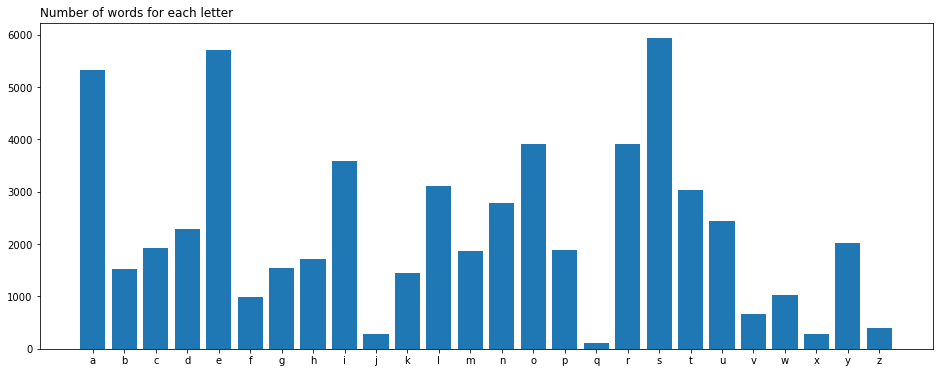

In [5]:
fig, ax = plt.subplots(figsize=(16,6))
ax.bar(range(26), word_count_by_letter.values(), tick_label=list(word_count_by_letter.keys()));
ax.set_title("Number of words for each letter", loc='left');

# Which words has the most common letters?

```Python
for word in all_words:
    words_score = 0
    for letter in word:
        words_score += len(words_by_letter[letter])
```

In [6]:
guesses = solve_wordle.get_most_unique_score_look_at_letter_score(all_words, all_words, [], [])
for score, word in guesses[0:10]:
    print(f"{word} with a score of {int(score)}")


soare with a score of 24791
arose with a score of 24791
aeros with a score of 24791
serai with a score of 24469
reais with a score of 24469
raise with a score of 24469
arise with a score of 24469
aesir with a score of 24469
aloes with a score of 23996
seral with a score of 23994


# Which word overlaps with the most other words?

This eliminates double counting words that show up for multiple letters. 

```Python
for word in all_words:
    words_that_overlap = set()
    for letter in word:
        words_that_overlap.union(words_by_letter[letter])
    score = len(words_that_overlap)
```

In [7]:
guesses = solve_wordle.get_most_unique_score_look_at_allowed_words(all_words, all_words, [], [])
for score, word in guesses[0:10]:
    print(f"{word} with a score of {score}")

toeas with a score of 12417
stoae with a score of 12417
aloes with a score of 12412
aeons with a score of 12407
soare with a score of 12395
arose with a score of 12395
aeros with a score of 12395
serai with a score of 12346
reais with a score of 12346
raise with a score of 12346


# First word

Note this was from February 4, 2022.

Plug in **TOEAS** and figure out what info Wordle gives us. Remember that 
- green = the letter is in the word and in the correct spot
- yellow = the letter is in the word but in the wrong spot
- gray = the letter is not in the word

<img src="images/toeas.png" width="400">



# What did we learn?
Here is the info we learned:
- The word has **T** but it is not the first letter
- The word does not have an **O**
- The word has at least one **E** in the 3rd spot
- The word has at least one **A** in the 4th spot
- The word does not have an **S**

Now translate that into data.

In [8]:
required_letters = set()
exclude_letters = set()

required_letters.add(('t', None)) # The word has T but it is not the first letter
exclude_letters.add(('t', 0))     # The word has T but it is not the first letter

exclude_letters.add(('o', None))  # The word does not have an O

required_letters.add(('e', 2))    # The word has at least one E in the 3rd spot

required_letters.add(('a', 3))    # The word has at least one A in the 4th spot

exclude_letters.add(('s', None))  # The word does not have an S

# Find all the words that are allowed
Use the data to filter the dictionary to only words that satisfy the rules we created

In [9]:
allowed_words, not_allowed_words = solve_wordle.get_words_with_letters(all_words, required_letters, exclude_letters)
print(f"Number of words eliminated {len(not_allowed_words)}")
print(f"Number of potential words left {len(allowed_words)}")
for i, word in enumerate(allowed_words):
    print(f"{i}. {word}")

Number of words eliminated 12965
Number of potential words left 7
0. cleat
1. wheat
2. great
3. bleat
4. cheat
5. exeat
6. pleat


# Find the guess for the second word
Now that we have an algorithm we just repeat until we find the solution

In [10]:
guesses = solve_wordle.get_most_unique_score_look_at_allowed_words(allowed_words, all_words, [], [])
for score, word in guesses:
    print(f"{word} with a score of {int(score)}")

cleat with a score of 4
pleat with a score of 3
cheat with a score of 3
bleat with a score of 3
wheat with a score of 2
great with a score of 1
exeat with a score of 1


# Second word

<img src="images/cleat.png" width="400">

In [11]:
exclude_letters.add(('c', None))  # The word does not have an C
required_letters.add(('l',1)) # The word has at least one L in the 2rd spot
required_letters.add(('t', 4))    # The word has at least one T in the 5th spot

In [12]:
allowed_words, not_allowed_words = solve_wordle.get_words_with_letters(all_words, required_letters, exclude_letters)
print(f"Number of words eliminated {len(not_allowed_words)}")
print(f"Number of potential words left {len(allowed_words)}")
for i in allowed_words:
    print(i)

Number of words eliminated 12970
Number of potential words left 2
bleat
pleat


# Find the guess for the thrid word

In [13]:
guesses = solve_wordle.get_most_unique_score_look_at_all_words(allowed_words, allowed_words, [], [])
for score, word in guesses:
    print(f"{word} with a score of {int(score)}")

pleat with a score of 1
bleat with a score of 1


# Third word

<img src="images/pleat.png" width="400">

# Compare alogirhtms

Let's look at how many guesses it takes to find 1,000 words in the dictionary and answer the following questions.

- How many guesses does it take to find a word?
- How long does the computer take to calculate the answer?

In [16]:
x = range(0, 15)
def plot_bar(number_words_by_count):
    y = [number_words_by_count.get(i,0) for i in x]
    
    fig, ax = plt.subplots(figsize=(16,4))
    ax.bar(x, y, tick_label=x);
    ax.set_xlim([0.5, 14.5])
    ax.set_ylim([0, 400])
    ax.set_xlabel('Number guesses to solve')
    ax.set_title("Number of words", loc='left');
    return y

# Just look at letter scores for allowed words

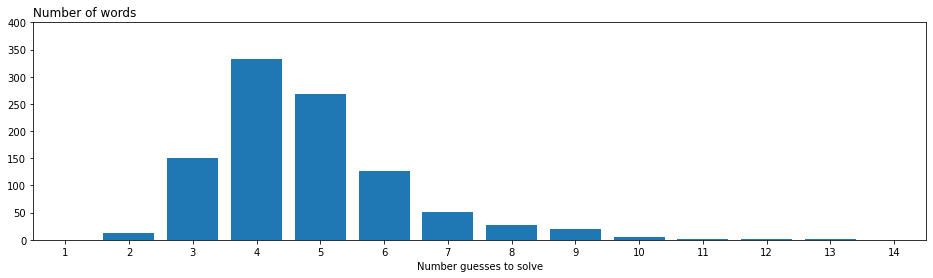

In [17]:
dt_letter_score = 7.276570796966553
number_words_by_count = {2: 12, 3: 151, 4: 332, 5: 269, 6: 127, 7: 51, 8: 28, 9: 19, 10: 6, 11: 2, 12: 1, 13: 2}
y_allowed_letters = plot_bar(number_words_by_count)

# Just look at letter scores for all words
Give a small bonus to allowed words

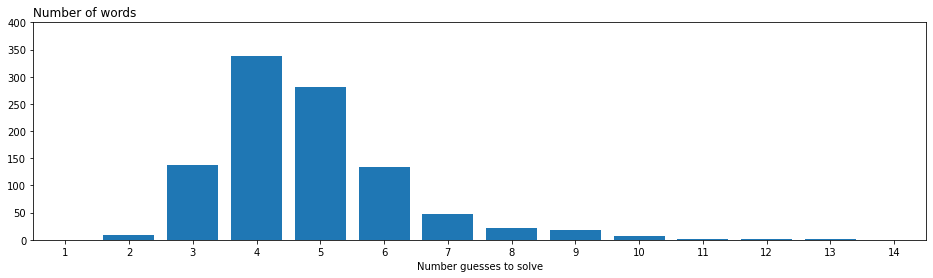

In [18]:
dt_letter_score = 14.363650798797607
number_words_by_count = {2: 9, 3: 138, 4: 339, 5: 281, 6: 134, 7: 48, 8: 21, 9: 18, 10: 7, 11: 2, 12: 1, 13: 2}
y_all_letters = plot_bar(number_words_by_count)

# Look at allowed words

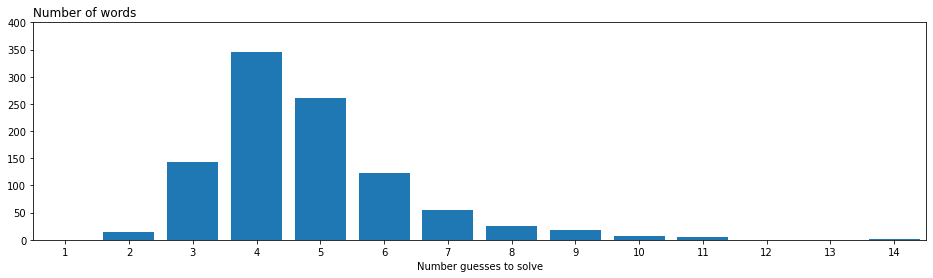

In [19]:
dt_allowed_words_score = 4591.0739669799805
number_words_by_count = {2: 15, 3: 144, 4: 345, 5: 260, 6: 123, 7: 55, 8: 26, 9: 18, 10: 7, 11: 5, 14: 2}
y_allowed_words = plot_bar(number_words_by_count)

# Look at all words to find best letters

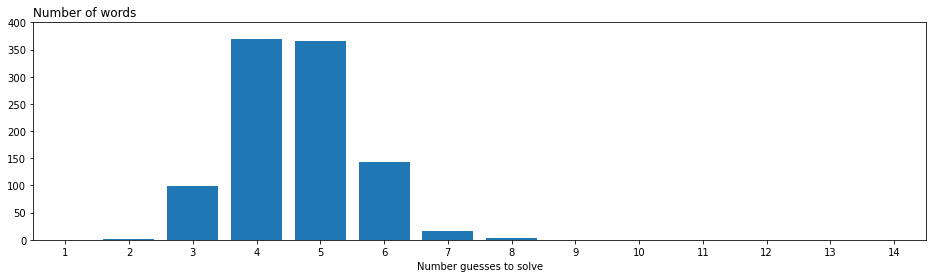

In [20]:
dt = 5000.753873825073
number_words_by_count = {2: 2, 3: 99, 4: 370, 5: 365, 6: 143, 7: 17, 8: 4}
y_all_words = plot_bar(number_words_by_count)

# Compare all algorithms

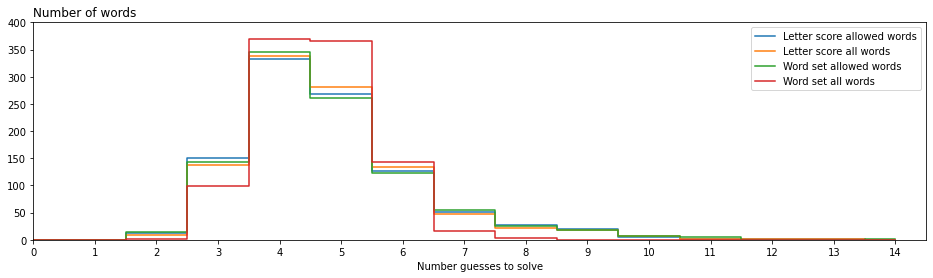

In [21]:
fig, ax = plt.subplots(figsize=(16,4))
ax.step(x, y_allowed_letters, where='mid', label='Letter score allowed words');
ax.step(x, y_all_letters, where='mid', label='Letter score all words');
ax.step(x, y_allowed_words, where='mid', label='Word set allowed words');
ax.step(x, y_all_words, where='mid', label='Word set all words');
ax.set_xlim([0.5, 14.5])
ax.set_ylim([0, 400])
ax.set_xlabel('Number guesses to solve')
ax.set_xticks(x)
ax.set_xticklabels(x)
ax.legend(loc='best')
ax.set_title("Number of words", loc='left');

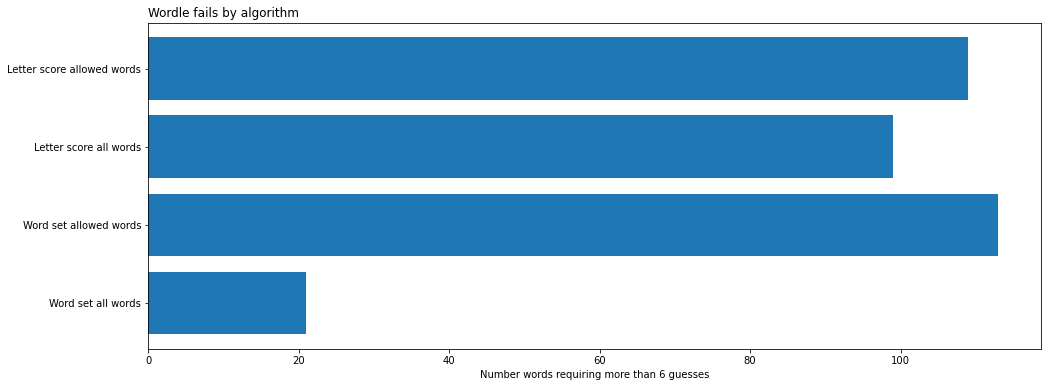

In [22]:
fig, ax = plt.subplots(figsize=(16,6))
ax.barh(range(4), 
        [sum(y_allowed_letters[7:]), sum(y_all_letters[7:]), sum(y_allowed_words[7:]), sum(y_all_words[7:])], 
        tick_label=['Letter score allowed words', 'Letter score all words', 'Word set allowed words', 'Word set all words'])
ax.invert_yaxis()
ax.set_xlabel('Number words requiring more than 6 guesses')
ax.set_title("Wordle fails by algorithm", loc='left');

# Other ideas

## What about paying attention to letter placement

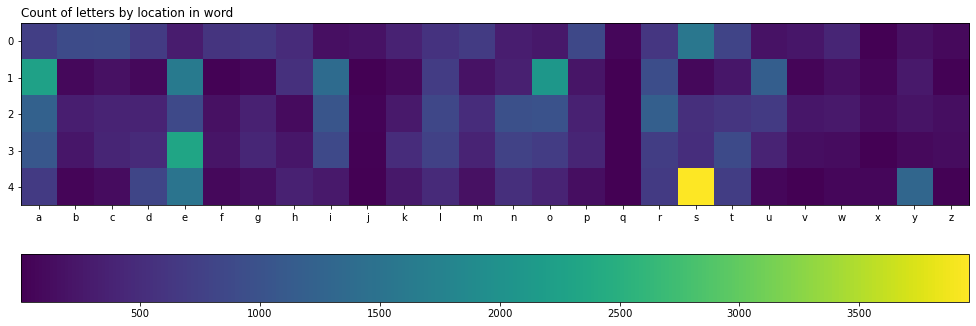

In [23]:
letter_count_by_location = np.zeros([5, 26])
letter_to_index = {letter: i for i, letter in enumerate(string.ascii_lowercase)}
for word in all_words:
    for i in range(5):
        letter_count_by_location[i, letter_to_index[word[i]]] += 1
fig, ax = plt.subplots(figsize=(17,6))
im = ax.imshow(letter_count_by_location)
ax.set_xticks(np.arange(26))
ax.set_xticklabels(string.ascii_lowercase)
cbar = ax.figure.colorbar(im, ax=ax, orientation='horizontal')
ax.set_title("Count of letters by location in word", loc='left');

## Why do some words take so long for solve
**LILLS** was one of the longest

In [24]:
solve_wordle.find_steps_required_to_solve(('lills', all_words, solve_wordle.get_most_unique_score_look_at_allowed_words, 5, True))


Number of Words Remaining: 12972
1. toeas with score of 12417
2. stoae with score of 12417
3. aloes with score of 12412
4. aeons with score of 12407
5. soare with score of 12395
guess = toeas

Number of Words Remaining: 508
1. ruins with score of 504
2. rudis with score of 501
3. nidus with score of 501
4. munis with score of 501
5. minus with score of 501
guess = ruins

Number of Words Remaining: 86
1. milks with score of 65
2. milfs with score of 61
3. films with score of 61
4. limbs with score of 60
5. kilps with score of 60
guess = milks

Number of Words Remaining: 19
1. wilds with score of 6
2. gilds with score of 5
3. silds with score of 4
4. dills with score of 4
5. wills with score of 3
guess = wilds

Number of Words Remaining: 13
1. pills with score of 2
2. pilis with score of 2
3. zills with score of 1
4. yills with score of 1
5. vills with score of 1
guess = pills

Number of Words Remaining: 11
1. zills with score of 1
2. yills with score of 1
3. vills with score of 1
4. ji

(16, 'lills')